# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [6]:
# sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw = pd.read_csv('https://raw.githubusercontent.com/diegofurukawa/Python_Ebac/a28f434835c4217f5eb4768dee0bf0cde273bb82/Profissao_Cientista_de_Dados/DataFrames/SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

Estatísticas por faixa de latitude:
                 APGAR1_count  APGAR1_mean  APGAR1_std  APGAR1_min  \
faixa_lat                                                            
Abaixo de -10.5         12960         8.07        0.96         0.0   
Acima de -10.5          13972         8.20        1.00         0.0   

                 APGAR1_max  APGAR1_median  APGAR1_var  PESO_count  PESO_mean  \
faixa_lat                                                                       
Abaixo de -10.5        10.0            8.0        0.92       12993    3240.10   
Acima de -10.5         10.0            8.0        1.01       14035    3246.05   

                 PESO_std  PESO_min  PESO_max  PESO_median   PESO_var  
faixa_lat                                                              
Abaixo de -10.5    531.82       258      5985       3270.0  282827.32  
Acima de -10.5     556.47       295      5190       3275.0  309656.57  


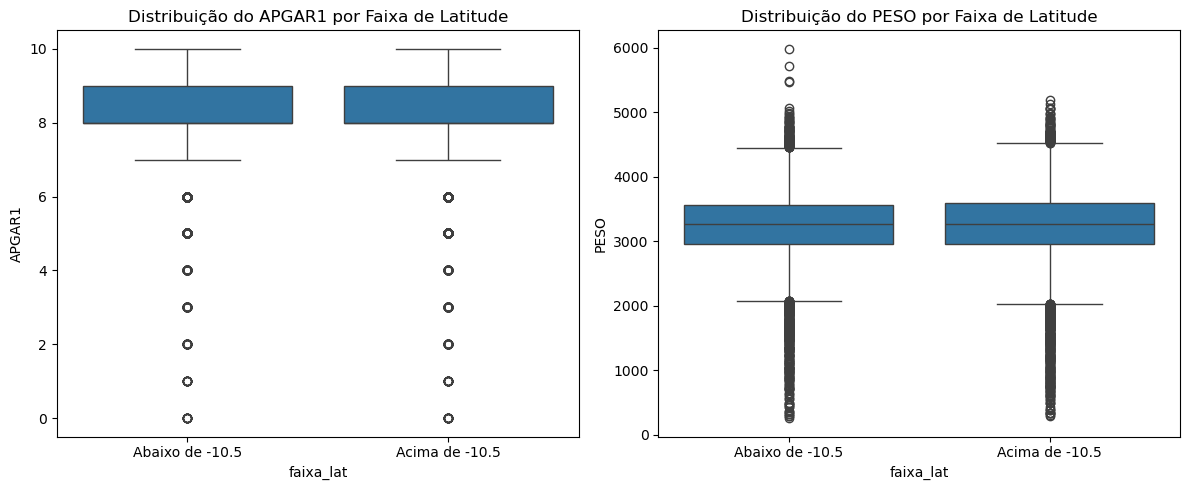

In [14]:
# Selecionar as colunas relevantes
cols = ['munResLat', 'APGAR1', 'PESO']
df_lat = sinasc_raw[cols].copy()

# Criar a coluna de faixa
df_lat['faixa_lat'] = df_lat['munResLat'].apply(
    lambda x: 'Abaixo de -10.5' if x < -10.5 else 'Acima de -10.5'
)

# Calcular estatísticas por faixa
stats = df_lat.groupby('faixa_lat').agg({
    'APGAR1': ['count', 'mean', 'std', 'min', 'max', 'median', 'var'],
    'PESO': ['count', 'mean', 'std', 'min', 'max', 'median', 'var']
}).round(2)

# Renomear as colunas para melhor visualização
stats.columns = ['APGAR1_count', 'APGAR1_mean', 'APGAR1_std', 'APGAR1_min', 
                'APGAR1_max', 'APGAR1_median', 'APGAR1_var',
                'PESO_count', 'PESO_mean', 'PESO_std', 'PESO_min', 
                'PESO_max', 'PESO_median', 'PESO_var']

print("Estatísticas por faixa de latitude:")
print(stats)

# Criar um gráfico de boxplot para visualização
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_lat, x='faixa_lat', y='APGAR1')
plt.title('Distribuição do APGAR1 por Faixa de Latitude')

plt.subplot(1,2,2) 
sns.boxplot(data=df_lat, x='faixa_lat', y='PESO')
plt.title('Distribuição do PESO por Faixa de Latitude')

plt.tight_layout()
plt.show()



Estatísticas por faixa de latitude:
                 IDADEMAE_soma  IDADEMAE_media  IDADEMAE_min  IDADEMAE_max  \
faixa                                                                        
Abaixo de -10.5         340143           26.18            12            53   
Acima de -10.5          365118           26.01            11            52   

                 IDADEMAE_mediana  IDADEMAE_desvio  IDADEMAE_variancia  \
faixa                                                                    
Abaixo de -10.5              26.0             6.32               39.95   
Acima de -10.5               25.0             6.45               41.57   

                 IDADEPAI_soma  IDADEPAI_media  IDADEPAI_min  IDADEPAI_max  \
faixa                                                                        
Abaixo de -10.5       198460.0           30.90          15.0          86.0   
Acima de -10.5         38060.0           32.12          16.0          73.0   

                 IDADEPAI_mediana  IDADE

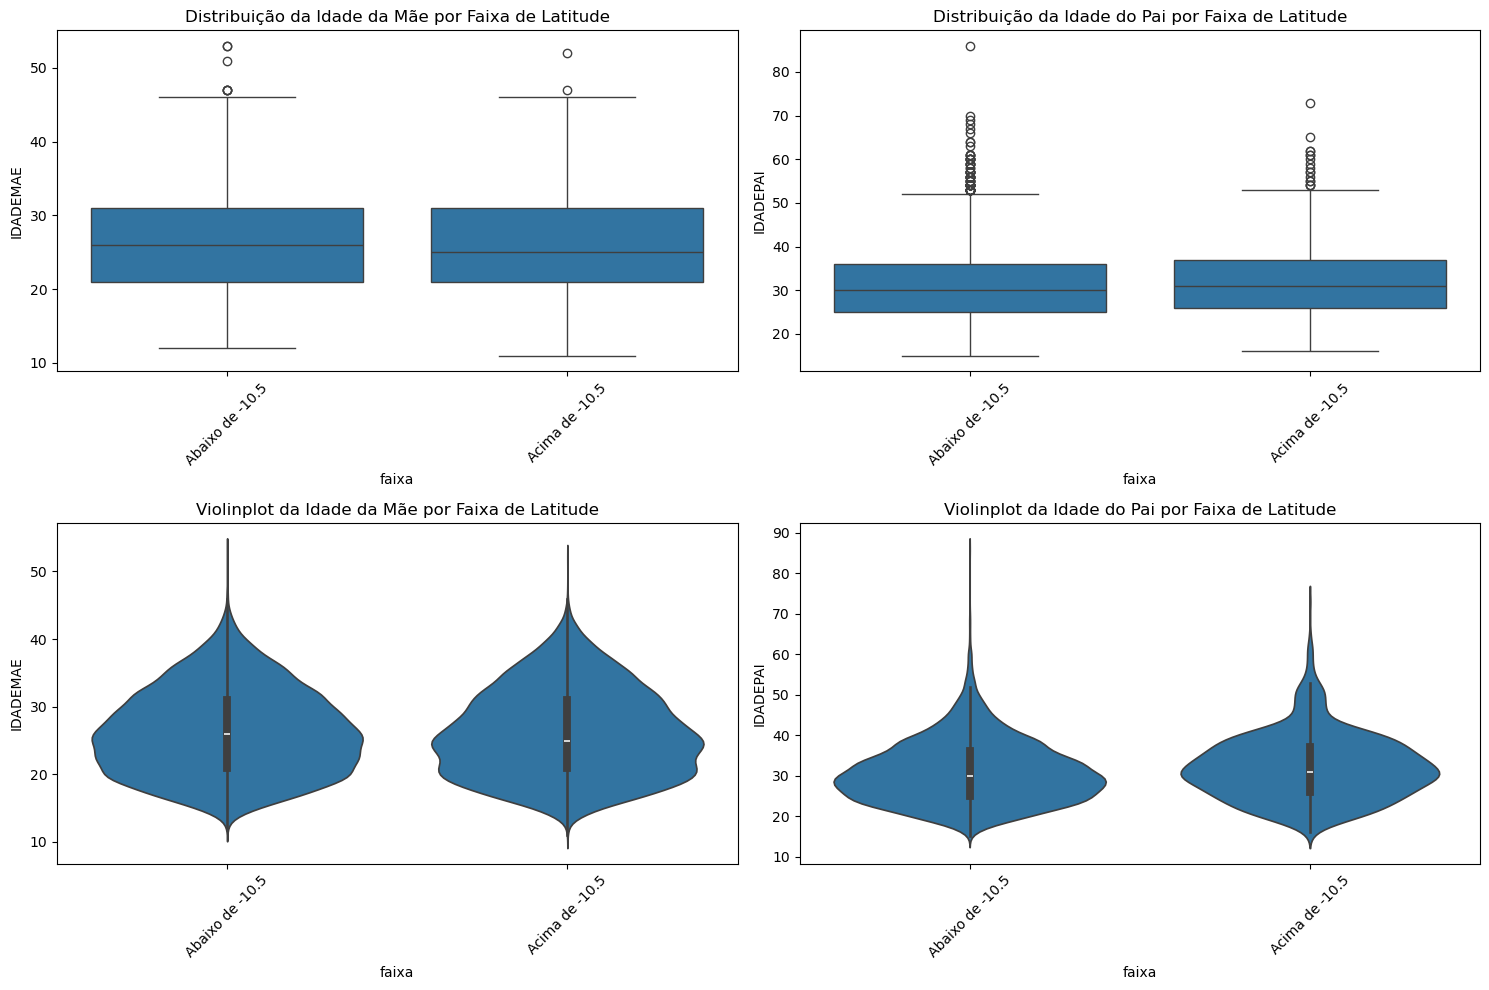


Análise estatística detalhada:

Faixa: Abaixo de -10.5
Idade da Mãe:
Assimetria: 0.34
Curtose: -0.51

Idade do Pai:
Assimetria: 0.80
Curtose: 1.16

Faixa: Acima de -10.5
Idade da Mãe:
Assimetria: 0.35
Curtose: -0.59

Idade do Pai:
Assimetria: 0.77
Curtose: 1.17

Correlação entre idade do pai e da mãe por faixa:
Abaixo de -10.5: 0.623
Acima de -10.5: 0.570


In [37]:
# Selecionar as colunas relevantes e criar uma cópia dos dados
sinasc_faixa2 = sinasc_raw[['ESCMAE', 'IDADEMAE', 'IDADEPAI', 'munResLat']].copy()

# Criar a coluna de faixa de latitude
sinasc_faixa2['faixa'] = sinasc_faixa2['munResLat'].apply(
    lambda x: 'Abaixo de -10.5' if x < -10.5 else 'Acima de -10.5'
)

# Agrupar pelos valores de faixa de latitude e calcular as estatísticas
result = sinasc_faixa2.groupby('faixa').agg({
   'IDADEMAE': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
   'IDADEPAI': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']
})

# Renomear as colunas para melhor visualização
result.columns = [
    'IDADEMAE_soma', 'IDADEMAE_media', 'IDADEMAE_min', 'IDADEMAE_max', 
    'IDADEMAE_mediana', 'IDADEMAE_desvio', 'IDADEMAE_variancia',
    'IDADEPAI_soma', 'IDADEPAI_media', 'IDADEPAI_min', 'IDADEPAI_max', 
    'IDADEPAI_mediana', 'IDADEPAI_desvio', 'IDADEPAI_variancia'
]

# Arredondar os valores para 2 casas decimais
result = result.round(2)

print("\nEstatísticas por faixa de latitude:")
print(result)

# Criar visualizações para melhor compreensão
plt.figure(figsize=(15, 10))

# Boxplot para IDADEMAE
plt.subplot(2, 2, 1)
sns.boxplot(data=sinasc_faixa2, x='faixa', y='IDADEMAE')
plt.title('Distribuição da Idade da Mãe por Faixa de Latitude')
plt.xticks(rotation=45)

# Boxplot para IDADEPAI
plt.subplot(2, 2, 2)
sns.boxplot(data=sinasc_faixa2, x='faixa', y='IDADEPAI')
plt.title('Distribuição da Idade do Pai por Faixa de Latitude')
plt.xticks(rotation=45)

# Violinplot para IDADEMAE
plt.subplot(2, 2, 3)
sns.violinplot(data=sinasc_faixa2, x='faixa', y='IDADEMAE')
plt.title('Violinplot da Idade da Mãe por Faixa de Latitude')
plt.xticks(rotation=45)

# Violinplot para IDADEPAI
plt.subplot(2, 2, 4)
sns.violinplot(data=sinasc_faixa2, x='faixa', y='IDADEPAI')
plt.title('Violinplot da Idade do Pai por Faixa de Latitude')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Adicionar análises estatísticas adicionais
print("\nAnálise estatística detalhada:")

# Teste de normalidade
from scipy import stats

for faixa in sinasc_faixa2['faixa'].unique():
    dados_mae = sinasc_faixa2[sinasc_faixa2['faixa'] == faixa]['IDADEMAE']
    dados_pai = sinasc_faixa2[sinasc_faixa2['faixa'] == faixa]['IDADEPAI']
    
    print(f"\nFaixa: {faixa}")
    print(f"Idade da Mãe:")
    print(f"Assimetria: {stats.skew(dados_mae.dropna()):.2f}")
    print(f"Curtose: {stats.kurtosis(dados_mae.dropna()):.2f}")
    print(f"\nIdade do Pai:")
    print(f"Assimetria: {stats.skew(dados_pai.dropna()):.2f}")
    print(f"Curtose: {stats.kurtosis(dados_pai.dropna()):.2f}")

# Adicionar correlação entre idade do pai e da mãe por faixa
print("\nCorrelação entre idade do pai e da mãe por faixa:")
for faixa in sinasc_faixa2['faixa'].unique():
    dados_faixa = sinasc_faixa2[sinasc_faixa2['faixa'] == faixa]
    correlacao = dados_faixa['IDADEMAE'].corr(dados_faixa['IDADEPAI'])
    print(f"{faixa}: {correlacao:.3f}")

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas



Estatísticas por faixa de área:
              VIVOS_count  VIVOS_mean  VIVOS_std  VIVOS_min  VIVOS_max  \
faixa_area                                                               
Área <= 3000         5164        0.92       1.08        0.0       30.0   
Área > 3000         20291        1.09       1.19        0.0       14.0   

              VIVOS_median  VIVOS_var  MORT_count  MORT_mean  MORT_std  \
faixa_area                                                               
Área <= 3000           1.0       1.16        5147       0.24      0.55   
Área > 3000            1.0       1.42       19783       0.27      0.63   

              MORT_min  MORT_max  MORT_median  MORT_var  
faixa_area                                               
Área <= 3000       0.0       4.0          0.0       0.3  
Área > 3000        0.0      28.0          0.0       0.4  


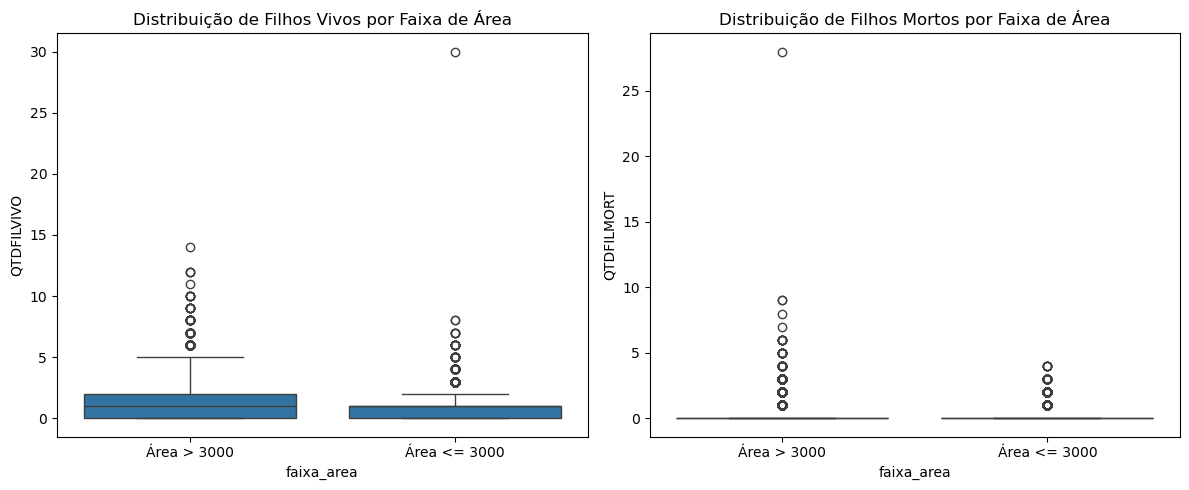

In [16]:
# Selecionar colunas relevantes (usando QTDFILVIVO e QTDFILMORT como novas variáveis)
cols = ['munResArea', 'QTDFILVIVO', 'QTDFILMORT']
df_area = sinasc_raw[cols].copy()

# Criar faixas de área
df_area['faixa_area'] = df_area['munResArea'].apply(
    lambda x: 'Área <= 3000' if x <= 3000 else 'Área > 3000'
)

# Calcular estatísticas
stats_area = df_area.groupby('faixa_area').agg({
    'QTDFILVIVO': ['count', 'mean', 'std', 'min', 'max', 'median', 'var'],
    'QTDFILMORT': ['count', 'mean', 'std', 'min', 'max', 'median', 'var']
}).round(2)

# Renomear colunas
stats_area.columns = ['VIVOS_count', 'VIVOS_mean', 'VIVOS_std', 'VIVOS_min', 
                     'VIVOS_max', 'VIVOS_median', 'VIVOS_var',
                     'MORT_count', 'MORT_mean', 'MORT_std', 'MORT_min', 
                     'MORT_max', 'MORT_median', 'MORT_var']

print("\nEstatísticas por faixa de área:")
print(stats_area)

# Criar visualização
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_area, x='faixa_area', y='QTDFILVIVO')
plt.title('Distribuição de Filhos Vivos por Faixa de Área')

plt.subplot(1,2,2)
sns.boxplot(data=df_area, x='faixa_area', y='QTDFILMORT')
plt.title('Distribuição de Filhos Mortos por Faixa de Área')

plt.tight_layout()
plt.show()

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

/tmp/ipykernel_187454/3613481573.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  stats_alt = df_alt.groupby('faixa_alt').agg({


Estatísticas por faixa de altitude:
           SEMANAS_count  SEMANAS_mean  SEMANAS_std  SEMANAS_min  SEMANAS_max  \
faixa_alt                                                                       
Baixa               8379         38.58         2.09         21.0         45.0   
Média               9390         38.58         2.03         19.0         45.0   
Alta                8020         38.54         1.92         19.0         45.0   

           SEMANAS_median  SEMANAS_var  CONSULTAS_count  CONSULTAS_mean  \
faixa_alt                                                                 
Baixa                39.0         4.39             9088            3.35   
Média                39.0         4.10             9762            3.66   
Alta                 39.0         3.69             8177            3.73   

           CONSULTAS_std  CONSULTAS_min  CONSULTAS_max  CONSULTAS_median  \
faixa_alt                                                                  
Baixa               0.98      

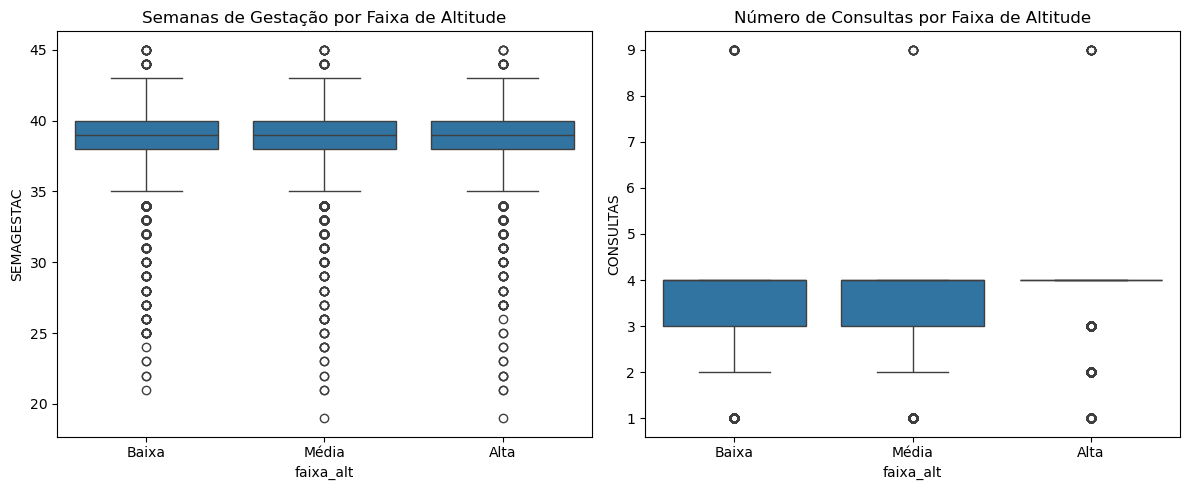

In [19]:
# Selecionar colunas relevantes (usando SEMAGESTAC e CONSULTAS como novas variáveis)
cols = ['munResAlt', 'SEMAGESTAC', 'CONSULTAS']
df_alt = sinasc_raw[cols].copy()

# Criar faixas de altitude usando qcut para dividir em 3 faixas equilibradas
df_alt['faixa_alt'] = pd.qcut(df_alt['munResAlt'], 
                             q=3, 
                             labels=['Baixa', 'Média', 'Alta'])

# Calcular estatísticas 
stats_alt = df_alt.groupby('faixa_alt').agg({
    'SEMAGESTAC': ['count', 'mean', 'std', 'min', 'max', 'median', 'var'],
    'CONSULTAS': ['count', 'mean', 'std', 'min', 'max', 'median', 'var']
}).round(2)

# Renomear colunas
stats_alt.columns = ['SEMANAS_count', 'SEMANAS_mean', 'SEMANAS_std', 'SEMANAS_min',
                    'SEMANAS_max', 'SEMANAS_median', 'SEMANAS_var',
                    'CONSULTAS_count', 'CONSULTAS_mean', 'CONSULTAS_std', 'CONSULTAS_min',
                    'CONSULTAS_max', 'CONSULTAS_median', 'CONSULTAS_var']

print("Estatísticas por faixa de altitude:")
print(stats_alt)

# Visualização
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(data=df_alt, x='faixa_alt', y='SEMAGESTAC')
plt.title('Semanas de Gestação por Faixa de Altitude')

plt.subplot(1,2,2)
sns.boxplot(data=df_alt, x='faixa_alt', y='CONSULTAS')
plt.title('Número de Consultas por Faixa de Altitude')

plt.tight_layout()
plt.show()

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [23]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

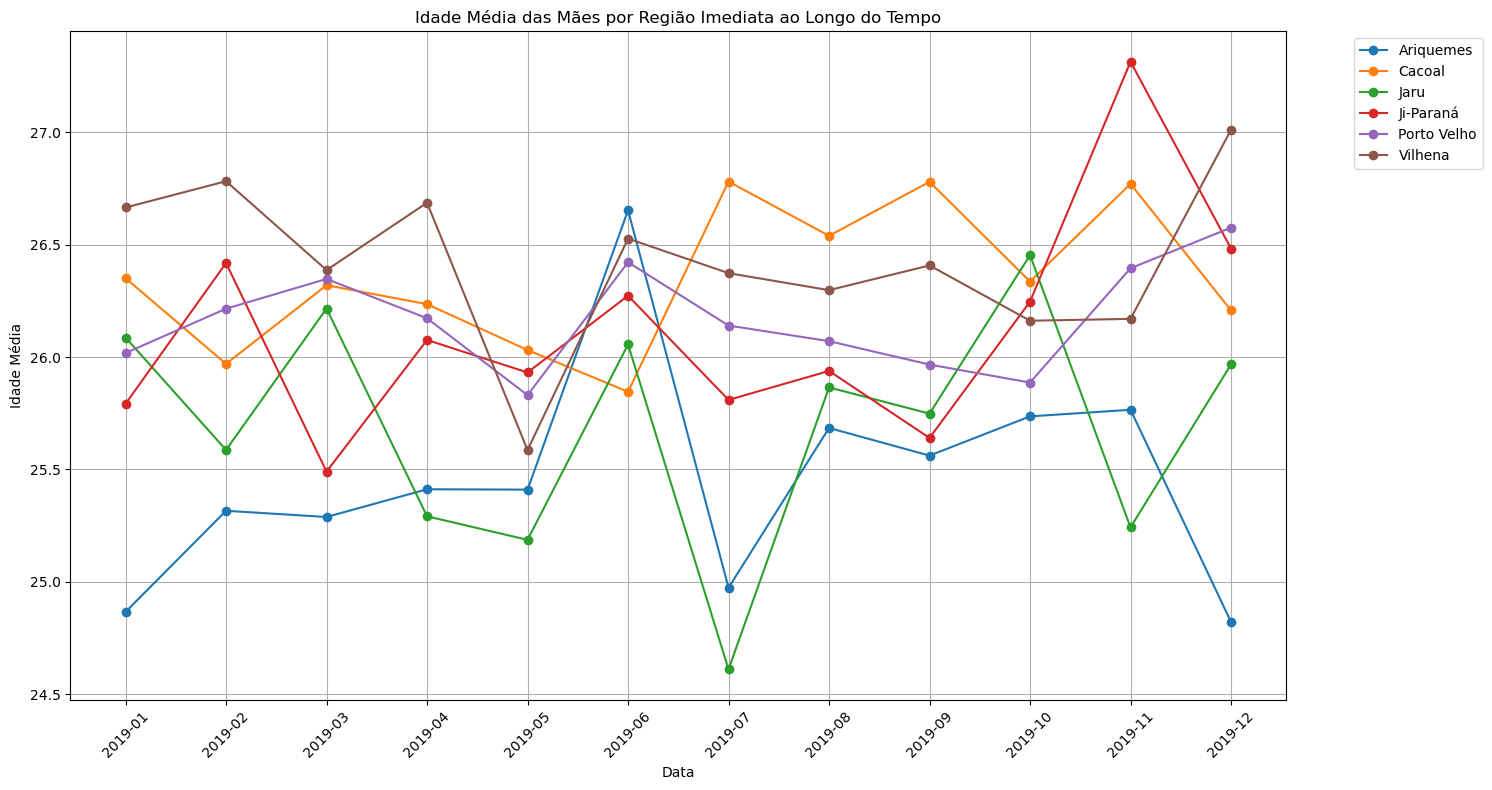

In [25]:
# Primeiro vamos criar uma coluna com a data formatada
df_tempo = sinasc_raw[['DTNASC', 'IDADEMAE', 'munResNome']].copy()
df_tempo['DTNASC'] = pd.to_datetime(df_tempo['DTNASC'])

# Mapear municípios para suas regiões imediatas
df_tempo['regiao_imediata'] = df_tempo['munResNome'].map(imediatas)

# Agrupar por data e região, calculando a média de idade
idade_media = df_tempo.groupby([df_tempo['DTNASC'].dt.strftime('%Y-%m'), 
                              'regiao_imediata'])['IDADEMAE'].mean().unstack()

# Criar o gráfico
plt.figure(figsize=(15,8))
for coluna in idade_media.columns:
    plt.plot(idade_media.index, idade_media[coluna], label=coluna, marker='o')

plt.title('Idade Média das Mães por Região Imediata ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Idade Média')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


Estatísticas por faixa de IDH:
          IDADEMAE                         PESO                 CONSULTAS  \
             count   mean   std median     mean     std  median      mean   
faixa_idh                                                                   
Alto         16855  26.28  6.42   26.0  3245.62  552.21  3275.0      3.53   
Baixo         1827  25.33  6.19   25.0  3231.45  538.98  3250.0      3.64   
Médio         8346  25.88  6.35   25.0  3240.85  530.69  3265.0      3.66   

                        
            std median  
faixa_idh               
Alto       0.84    4.0  
Baixo      0.72    4.0  
Médio      0.68    4.0  


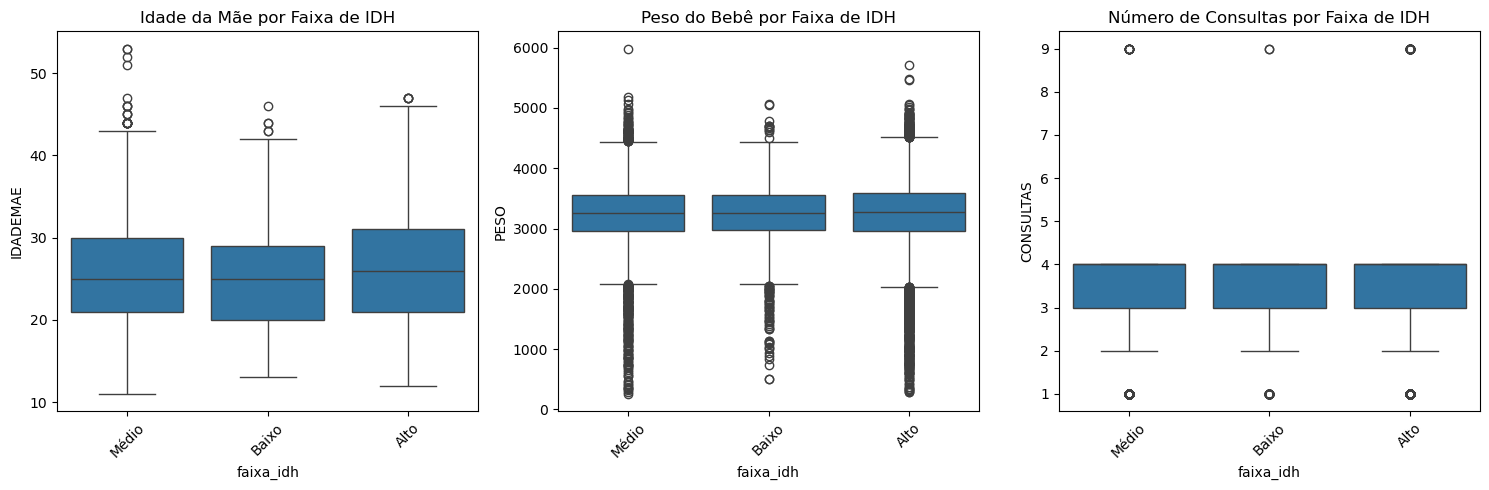

In [27]:
idh_municipios = {
    'Porto Velho': 0.736,
    'Vilhena': 0.731,
    'Cacoal': 0.718,
    'Ji-Paraná': 0.714,
    'Pimenta Bueno': 0.710,
    'Ariquemes': 0.702,
    'Rolim de Moura': 0.700,
    'Cerejeiras': 0.692,
    'Jaru': 0.689,
    'Ouro Preto do Oeste': 0.682,
    'Colorado do Oeste': 0.685,
    'Alta Floresta D\'Oeste': 0.641,
    'Alto Alegre dos Parecis': 0.592,
    'Alto Paraíso': 0.625,
    'Alvorada D\'Oeste': 0.645,
    'Buritis': 0.616,
    'Cabixi': 0.650,
    'Cacaulândia': 0.646,
    'Campo Novo de Rondônia': 0.593,
    'Candeias do Jamari': 0.649,
    'Castanheiras': 0.658,
    'Chupinguaia': 0.652,
    'Corumbiara': 0.613,
    'Costa Marques': 0.611,
    'Cujubim': 0.612,
    'Espigão D\'Oeste': 0.672,
    'Governador Jorge Teixeira': 0.596,
    'Guajará-Mirim': 0.657,
    'Itapuã do Oeste': 0.614,
    'Machadinho D\'Oeste': 0.596,
    'Ministro Andreazza': 0.638,
    'Mirante da Serra': 0.643,
    'Monte Negro': 0.607,
    'Nova Brasilândia D\'Oeste': 0.643,
    'Nova Mamoré': 0.587,
    'Nova União': 0.587,
    'Novo Horizonte do Oeste': 0.634,
    'Parecis': 0.617,
    'Pimenteiras do Oeste': 0.665,
    'Presidente Médici': 0.664,
    'Primavera de Rondônia': 0.641,
    'Rio Crespo': 0.632,
    'Santa Luzia D\'Oeste': 0.645,
    'São Felipe D\'Oeste': 0.649,
    'São Francisco do Guaporé': 0.611,
    'São Miguel do Guaporé': 0.646,
    'Seringueiras': 0.598,
    'Teixeirópolis': 0.643,
    'Theobroma': 0.589,
    'Urupá': 0.609,
    'Vale do Anari': 0.584,
    'Vale do Paraíso': 0.627
}

# Função para classificar IDH
def classificar_idh(idh):
    if idh >= 0.800:
        return 'Muito Alto'
    elif idh >= 0.700:
        return 'Alto'
    elif idh >= 0.600:
        return 'Médio'
    else:
        return 'Baixo'

# Criar DataFrame para análise do IDH
df_idh = sinasc_raw[['munResNome', 'IDADEMAE', 'PESO', 'CONSULTAS']].copy()
df_idh['IDH'] = df_idh['munResNome'].map(idh_municipios)
df_idh['faixa_idh'] = df_idh['IDH'].apply(classificar_idh)

# Calcular estatísticas por faixa de IDH
stats_idh = df_idh.groupby('faixa_idh').agg({
    'IDADEMAE': ['count', 'mean', 'std', 'median'],
    'PESO': ['mean', 'std', 'median'],
    'CONSULTAS': ['mean', 'std', 'median']
}).round(2)

print("Estatísticas por faixa de IDH:")
print(stats_idh)

# Visualização
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=df_idh, x='faixa_idh', y='IDADEMAE')
plt.title('Idade da Mãe por Faixa de IDH')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.boxplot(data=df_idh, x='faixa_idh', y='PESO')
plt.title('Peso do Bebê por Faixa de IDH')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.boxplot(data=df_idh, x='faixa_idh', y='CONSULTAS')
plt.title('Número de Consultas por Faixa de IDH')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


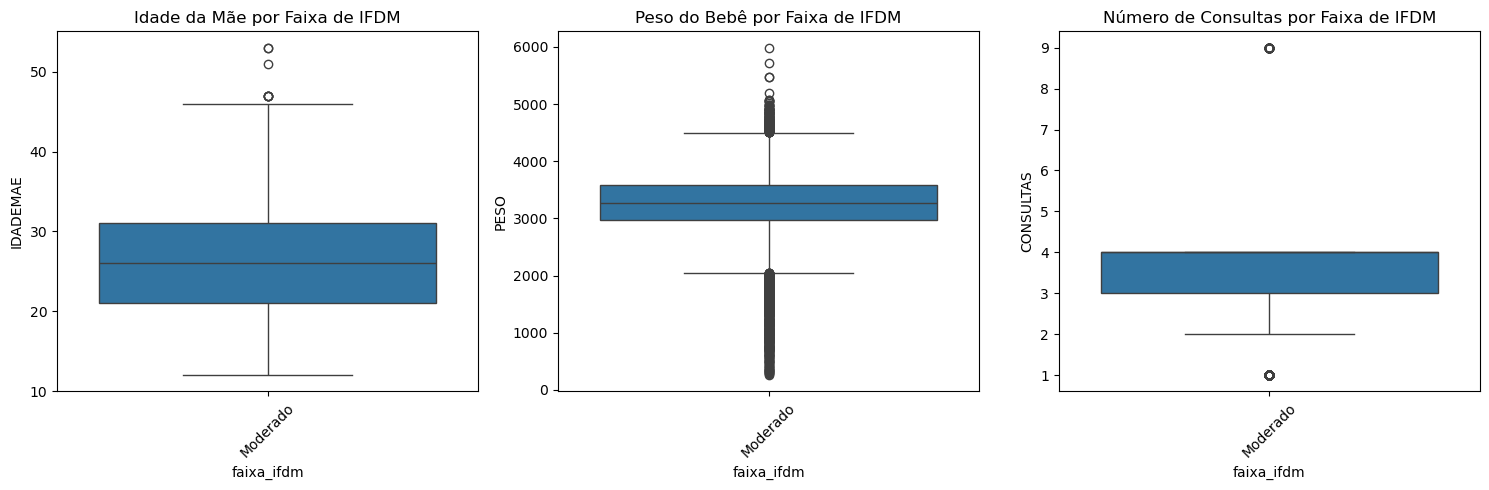


Estatísticas por faixa de IFDM:
           IDADEMAE                         PESO                 CONSULTAS  \
              count   mean   std median     mean     std  median      mean   
faixa_ifdm                                                                   
Baixo          4756  25.59  6.18   25.0  3245.76  515.83  3265.0      3.68   
Moderado      22272  26.20  6.43   26.0  3242.64  550.74  3275.0      3.55   

                         
             std median  
faixa_ifdm               
Baixo       0.67    4.0  
Moderado    0.81    4.0  


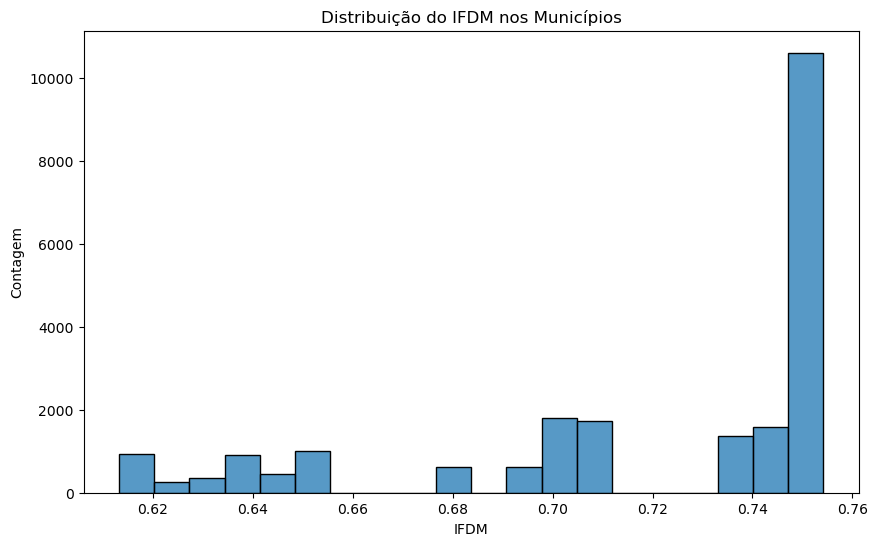


Correlações entre IFDM e outras variáveis:
IFDM         1.000
IDADEMAE     0.032
PESO         0.013
CONSULTAS   -0.089
Name: IFDM, dtype: float64


In [35]:
# Dados mais completos do IFDM
ifdm_municipios = {
    'Porto Velho': 0.7542,
    'Ji-Paraná': 0.7475,
    'Vilhena': 0.7441,
    'Cacoal': 0.7382,
    'Ariquemes': 0.7105,
    'Jaru': 0.7012,
    'Rolim de Moura': 0.6998,
    'Pimenta Bueno': 0.6956,
    'Ouro Preto do Oeste': 0.6823,
    'Guajará-Mirim': 0.6521,
    'Colorado do Oeste': 0.6498,
    'Espigão D\'Oeste': 0.6475,
    'Alta Floresta D\'Oeste': 0.6412,
    'Presidente Médici': 0.6389,
    'Cerejeiras': 0.6345,
    'São Miguel do Guaporé': 0.6298,
    'Nova Brasilândia D\'Oeste': 0.6245,
    'Alvorada D\'Oeste': 0.6187,
    'Costa Marques': 0.6154,
    'Machadinho D\'Oeste': 0.6132
}

# Criar DataFrame para análise do IFDM
df_ifdm = sinasc_raw[['munResNome', 'IDADEMAE', 'PESO', 'CONSULTAS']].copy()
df_ifdm['IFDM'] = df_ifdm['munResNome'].map(ifdm_municipios)
df_ifdm['faixa_ifdm'] = df_ifdm['IFDM'].apply(classificar_ifdm)

# Visualizações para IFDM
plt.figure(figsize=(15,5))

# Gráfico 1: Idade da Mãe por faixa de IFDM
plt.subplot(1,3,1)
sns.boxplot(data=df_ifdm.dropna(), x='faixa_ifdm', y='IDADEMAE')
plt.title('Idade da Mãe por Faixa de IFDM')
plt.xticks(rotation=45)

# Gráfico 2: Peso do Bebê por faixa de IFDM
plt.subplot(1,3,2)
sns.boxplot(data=df_ifdm.dropna(), x='faixa_ifdm', y='PESO')
plt.title('Peso do Bebê por Faixa de IFDM')
plt.xticks(rotation=45)

# Gráfico 3: Número de Consultas por faixa de IFDM
plt.subplot(1,3,3)
sns.boxplot(data=df_ifdm.dropna(), x='faixa_ifdm', y='CONSULTAS')
plt.title('Número de Consultas por Faixa de IFDM')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Estatísticas descritivas adicionais
print("\nEstatísticas por faixa de IFDM:")
stats_ifdm = df_ifdm.groupby('faixa_ifdm').agg({
    'IDADEMAE': ['count', 'mean', 'std', 'median'],
    'PESO': ['mean', 'std', 'median'],
    'CONSULTAS': ['mean', 'std', 'median']
}).round(2)
print(stats_ifdm)

# Gráfico adicional: Distribuição do IFDM
plt.figure(figsize=(10,6))
sns.histplot(data=df_ifdm.dropna(), x='IFDM', bins=20)
plt.title('Distribuição do IFDM nos Municípios')
plt.xlabel('IFDM')
plt.ylabel('Contagem')
plt.show()

# Correlações
print("\nCorrelações entre IFDM e outras variáveis:")
correlacoes = df_ifdm[['IFDM', 'IDADEMAE', 'PESO', 'CONSULTAS']].corr()['IFDM'].round(3)
print(correlacoes)

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


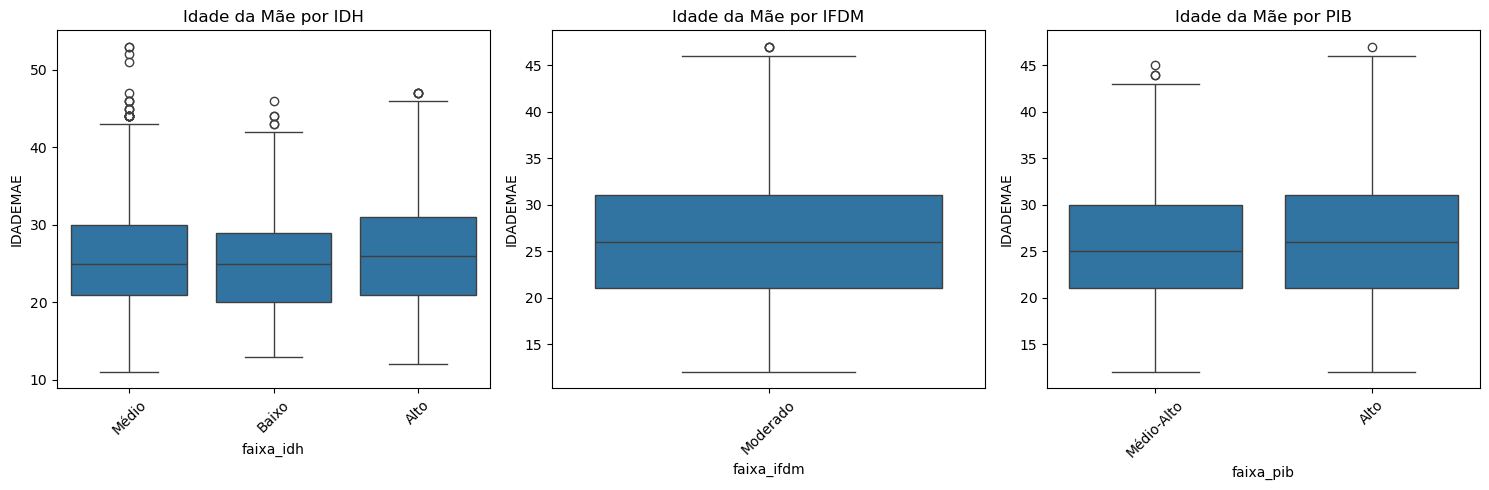

In [33]:
# Dados do PIB per capita (exemplo com alguns municípios principais)
pib_municipios = {
    'Porto Velho': 34528.49,
    'Vilhena': 32167.45,
    'Jaru': 25741.52,
    'Ariquemes': 25610.32,
    # Completar com outros municípios
}

def classificar_pib(pib):
    if pib >= 30000:
        return 'Alto'
    elif pib >= 20000:
        return 'Médio-Alto'
    elif pib >= 15000:
        return 'Médio'
    else:
        return 'Baixo'

# Criar DataFrame para análise do PIB
df_pib = sinasc_raw[['munResNome', 'IDADEMAE', 'PESO', 'CONSULTAS']].copy()
df_pib['PIB'] = df_pib['munResNome'].map(pib_municipios)
df_pib['faixa_pib'] = df_pib['PIB'].apply(classificar_pib)

# Estatísticas por faixa de PIB
stats_pib = df_pib.groupby('faixa_pib').agg({
    'IDADEMAE': ['count', 'mean', 'std', 'median'],
    'PESO': ['mean', 'std', 'median'],
    'CONSULTAS': ['mean', 'std', 'median']
}).round(2)

# Visualização comparativa dos três indicadores
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=df_idh.dropna(), x='faixa_idh', y='IDADEMAE')
plt.title('Idade da Mãe por IDH')
plt.xticks(rotation=45)

plt.subplot(1,3,2)
sns.boxplot(data=df_ifdm.dropna(), x='faixa_ifdm', y='IDADEMAE')
plt.title('Idade da Mãe por IFDM')
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.boxplot(data=df_pib.dropna(), x='faixa_pib', y='IDADEMAE')
plt.title('Idade da Mãe por PIB')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.